##**Principal Component Analysis**

In [1]:

from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt


In [2]:

iris = load_iris()
X = iris.data
y = iris.target


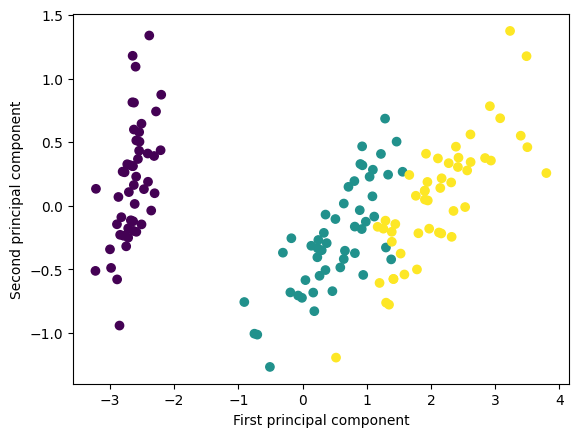

In [3]:

pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y)
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.show()


In [4]:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [6]:
import numpy as np

In [7]:

cov_matrix = np.cov(X_scaled.T)


In [8]:

eigen_values, eigen_vectors = np.linalg.eig(cov_matrix)


In [9]:

sorted_index = np.argsort(eigen_values)[::-1]
sorted_eigenvalue = eigen_values[sorted_index]
sorted_eigenvectors = eigen_vectors[:,sorted_index]


In [10]:

k = 2
principal_components = sorted_eigenvectors[:,:k]


In [11]:

X_new = np.dot(X_scaled, principal_components)


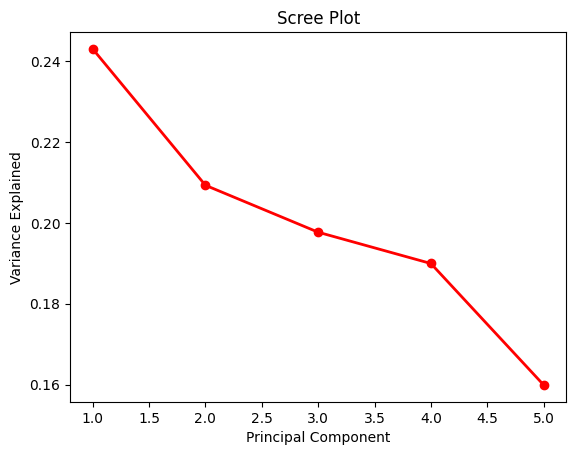

In [12]:

from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

X = np.random.rand(100,5)
pca = PCA().fit(X)
var_exp = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)

# Plot Scree Plot
plt.plot(range(1,len(var_exp)+1), pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()


##**ACF and PACF**

In [ ]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from statsmodels.tsa.stattools import acf, pacf


df = pd.read_csv('https://github.com/selva86/datasets/raw/master/AirPassengers.csv')
acf_values = acf(df.value.tolist(), nlags=50)
pacf_values = pacf(df.value.tolist(), nlags=20)
fig = make_subplots(rows=1, cols=2, subplot_titles=('Autocorrelation Function', 'Partial Autocorrelation Function'))
fig.add_trace(go.Bar(x=list(range(len(acf_values))), y=acf_values, name='ACF'), row=1, col=1)
fig.add_trace(go.Bar(x=list(range(len(pacf_values))), y=pacf_values, name='PACF'), row=1, col=2)
fig.update_layout(
    height=600, width=1200, title_text="ACF and PACF Plots",
    showlegend=False,
    template="plotly_white"
)
fig.update_xaxes(title_text="Lags", row=1, col=1)
fig.update_yaxes(title_text="ACF", row=1, col=1)
fig.update_xaxes(title_text="Lags", row=1, col=2)
fig.update_yaxes(title_text="PACF", row=1, col=2)

fig.show()


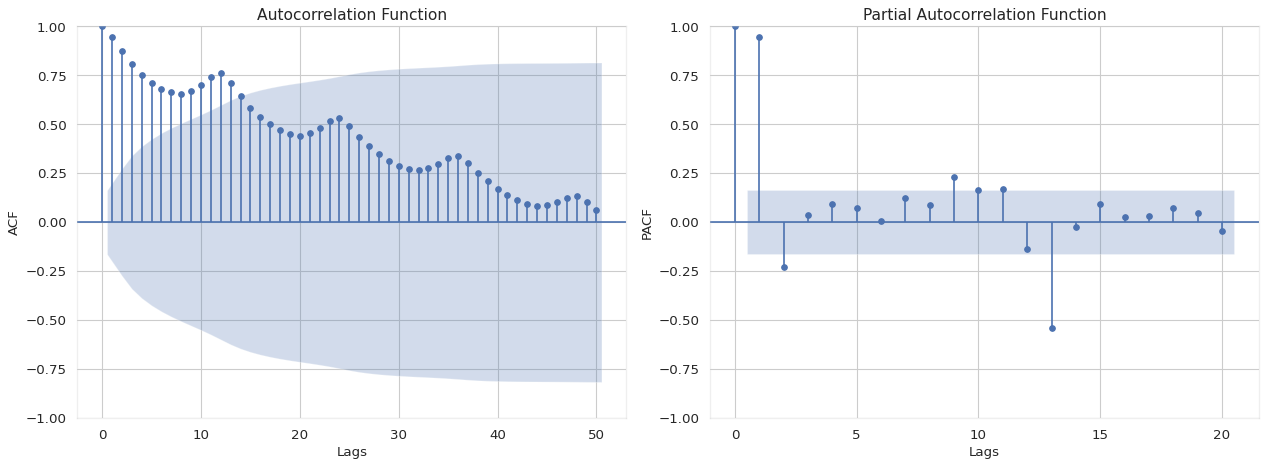

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
df = pd.read_csv('https://github.com/selva86/datasets/raw/master/AirPassengers.csv')
sns.set(style="whitegrid")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6), dpi=80)
plot_acf(df.value.tolist(), ax=ax1, lags=50)
plot_pacf(df.value.tolist(), ax=ax2, lags=20)
ax1.set_title('Autocorrelation Function', fontsize=14)
ax2.set_title('Partial Autocorrelation Function', fontsize=14)
ax1.set_xlabel('Lags', fontsize=12)
ax2.set_xlabel('Lags', fontsize=12)
ax1.set_ylabel('ACF', fontsize=12)
ax2.set_ylabel('PACF', fontsize=12)
for ax in [ax1, ax2]:
    ax.spines["top"].set_alpha(.3)
    ax.spines["bottom"].set_alpha(.3)
    ax.spines["right"].set_alpha(.3)
    ax.spines["left"].set_alpha(.3)
    ax.tick_params(axis='both', labelsize=12)

plt.tight_layout()
plt.show()


##**Data Visualization and Pre-processing**

Loading Dataset

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import IsolationForest

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
df = pd.read_csv(url, delimiter=';')

df.head()



,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [14]:
print(df.shape)


(1599, 12)


In [ ]:
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [15]:

print(df.describe())



       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000         

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [17]:
duplicates = df.duplicated().sum()
print("Number of duplicate rows:", duplicates)


Number of duplicate rows: 240


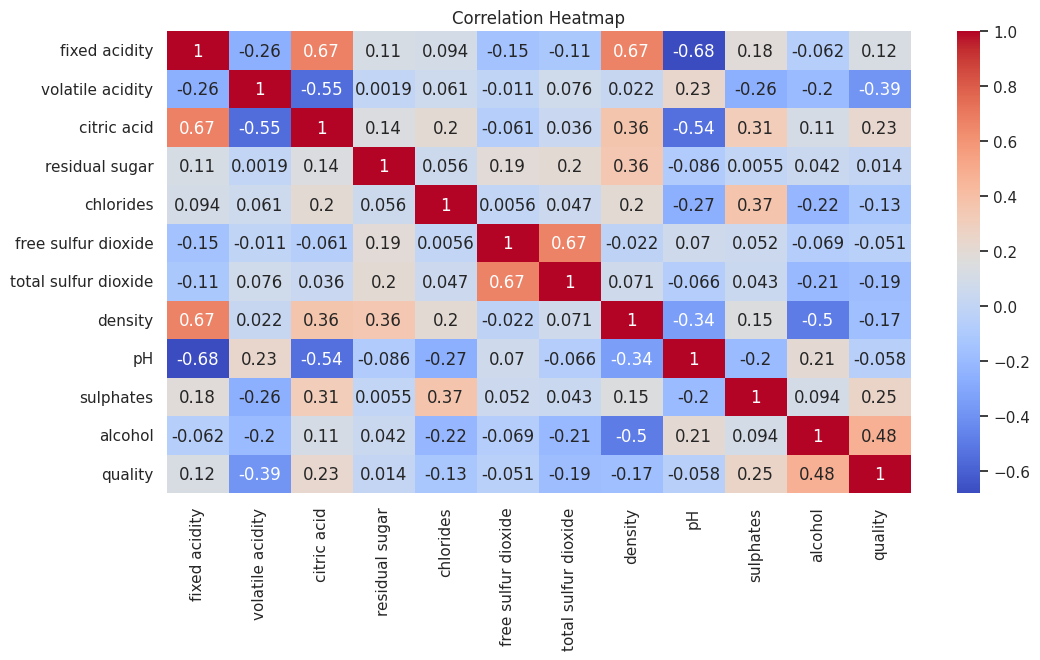

In [ ]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


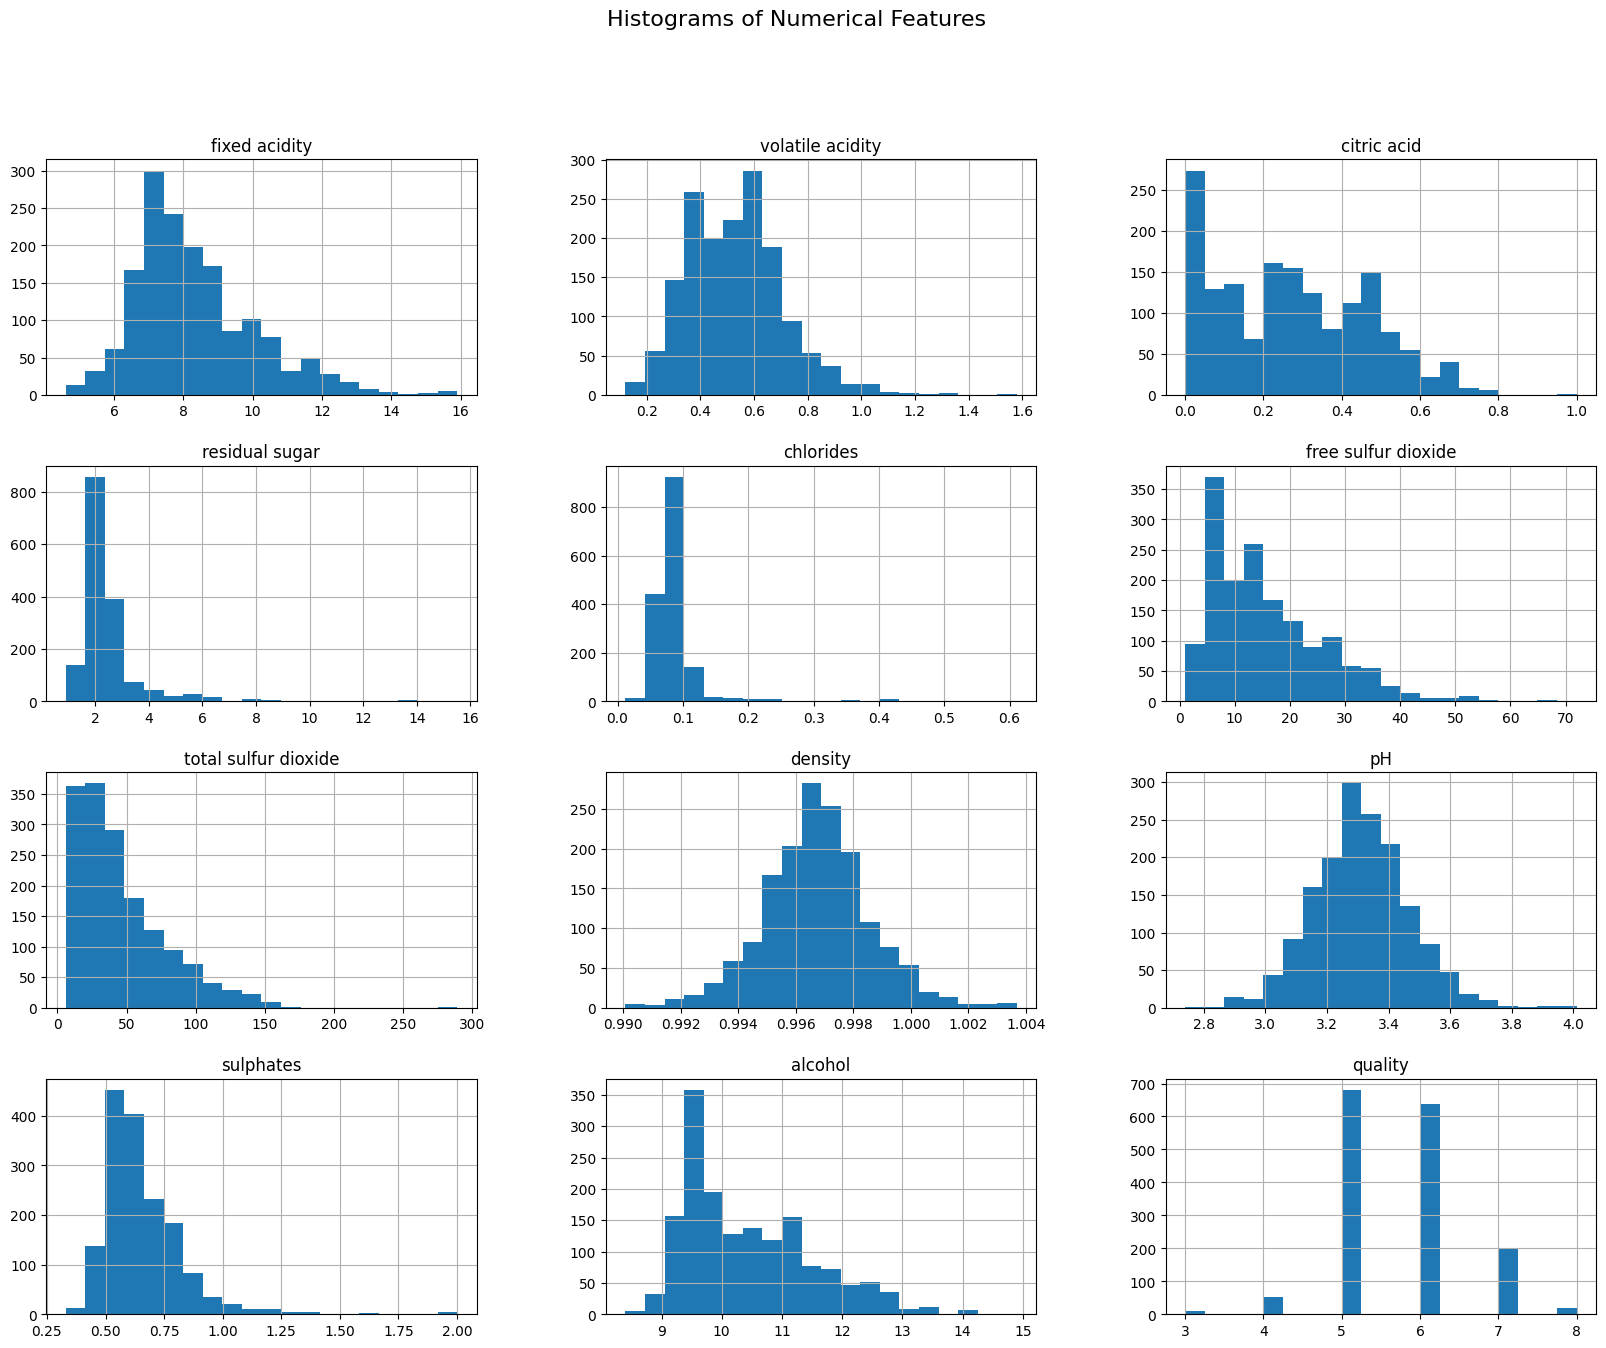

In [18]:
df.hist(bins=20, figsize=(20, 15))
plt.suptitle('Histograms of Numerical Features', fontsize=16)
plt.show()


In [20]:
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
print(df_imputed)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


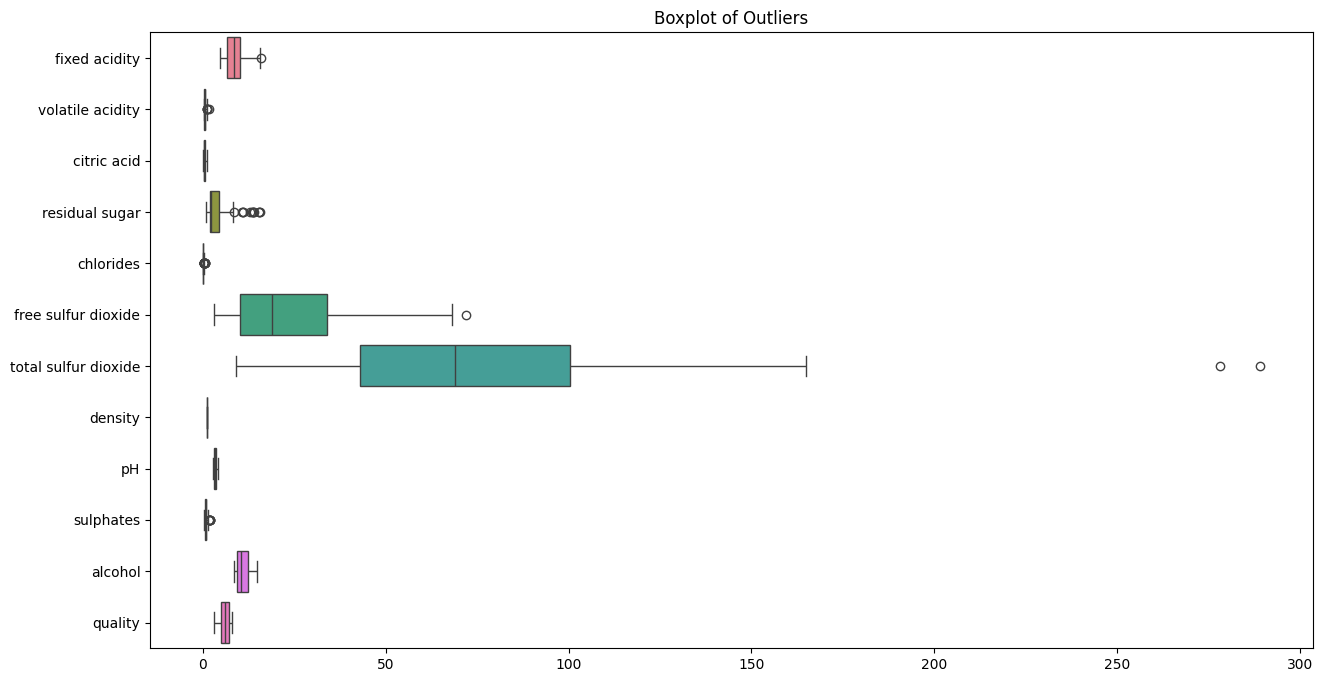

In [21]:
iso = IsolationForest(contamination=0.1)
outliers = iso.fit_predict(df_imputed)
outliers_mask = outliers == -1
outliers_df = df_imputed[outliers_mask]

plt.figure(figsize=(15, 8))
sns.boxplot(data=outliers_df, orient="h")
plt.title("Boxplot of Outliers")
plt.show()

In [ ]:
import pandas as pd
label_encoded_quality = df_outliers_removed['quality']
df_encoded = pd.get_dummies(label_encoded_quality, prefix='quality')
print("DataFrame after one-hot encoding:\n", df_encoded.head())


DataFrame after one-hot encoding:
    quality_0  quality_1  quality_2  quality_3  quality_4  quality_5
0      False      False       True      False      False      False
1      False      False       True      False      False      False
2      False      False       True      False      False      False
3      False      False      False       True      False      False
4      False      False       True      False      False      False
